Saving IRIS.csv to IRIS.csv
Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


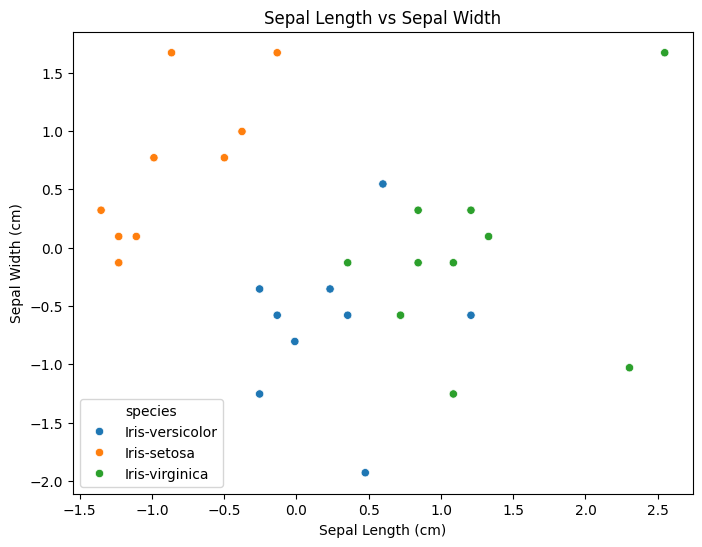

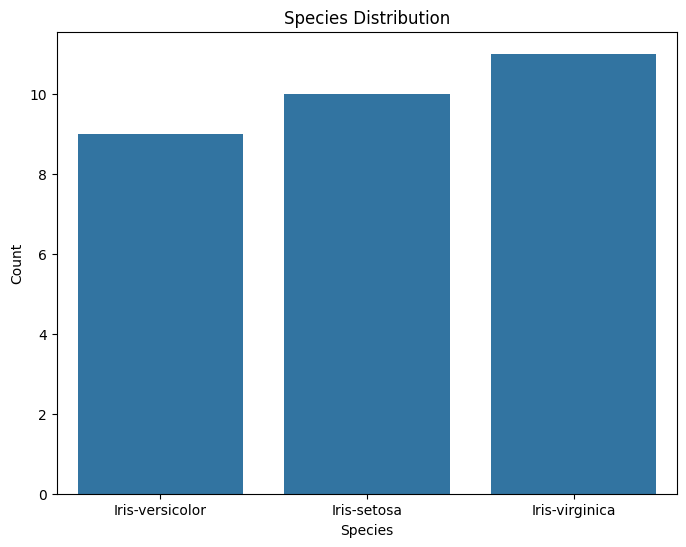

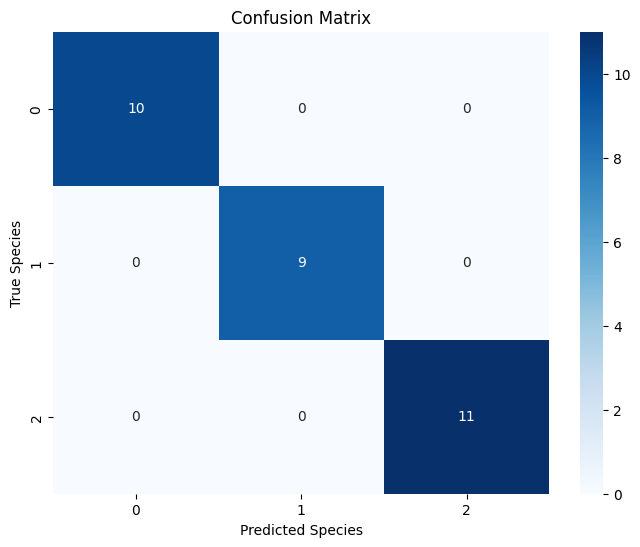

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Upload the original IRIS dataset
uploaded = files.upload()

# Load the original IRIS dataset
iris_df = pd.read_csv('IRIS.csv')

# Separate features and target variable
X = iris_df.drop(columns=['species'])
y = iris_df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for some algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_mat)

# Plot 1: Scatter plot of Sepal Length vs Sepal Width
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Plot 2: Bar chart of species distribution
plt.figure(figsize=(8,6))
sns.countplot(x=y_test)
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Plot 3: Confusion matrix heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.show()

# Upload the new measurements CSV file
uploaded_new = files.upload()

# Load the new measurements file
new_measurements_df = pd.read_csv('iris_measurements.csv')

# Standardize the new measurements (using the same scaler fitted on training data)
new_measurements_scaled = scaler.transform(new_measurements_df)

# Predict species for the new measurements
new_predictions = model.predict(new_measurements_scaled)

# Add the predictions to the DataFrame
new_measurements_df['predicted_species'] = new_predictions

# Display the DataFrame with predictions
print(new_measurements_df)